# Week 9 Practice

## Black-Scholes Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf

In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


###  European Options

Non-Dividend Paying Options

In [3]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [4]:
euro_option_bs(100, 100, 1, 0.05, 0.25, 'call')

12.335998930368717

In [5]:
S = np.linspace(50,150,11)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], 100, 1, 0.05, 0.25, 'call')

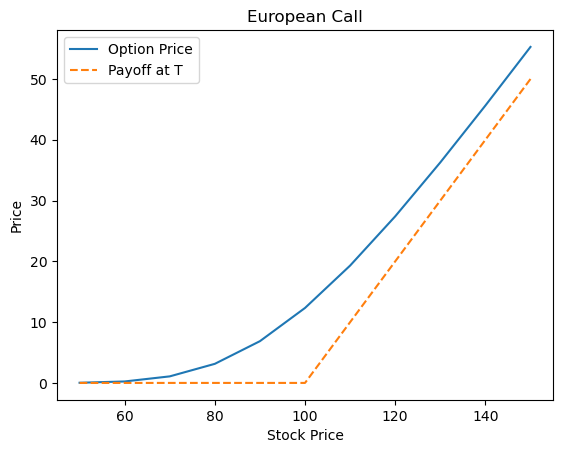

In [6]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-100,0), '--')
plt.xlabel('Stock Price')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])

Dividend Paying Options

In [7]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [8]:
euro_option_bsm(100, 100, 1, 0.05, 0.03, 0.25, 'call')

10.549284934339425

In [9]:
T = np.linspace(0.25,3,12)
cpd = np.zeros((len(T),1))
for i in range(len(T)):
    cpd [i] = euro_option_bsm(100, 100, T[i], 0.05, 0.03, 0.25, 'call')

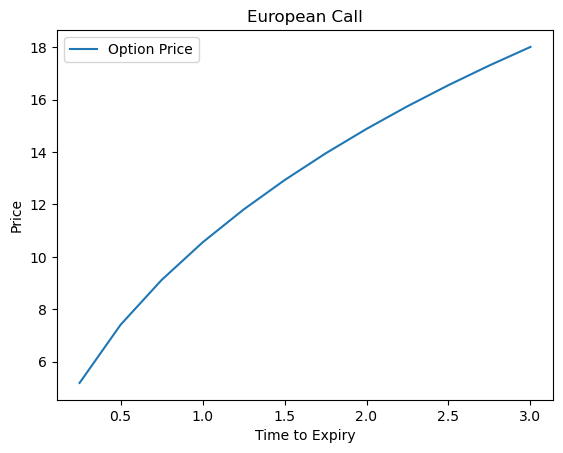

In [10]:
fig = plt.figure()
plt.plot(T, cpd, '-')
plt.xlabel('Time to Expiry')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price'])

### Option Trading

Has Black Scholes correctly predicted the market value of the options?

In [11]:
AAPL = yf.Ticker('AAPL')
opt = AAPL.option_chain('2024-03-22')
opt.calls

ValueError: Expiration `2024-03-22` cannot be found. Available expirations are: [2024-11-22, 2024-11-29, 2024-12-06, 2024-12-13, 2024-12-20, 2024-12-27, 2025-01-17, 2025-02-21, 2025-03-21, 2025-04-17, 2025-06-20, 2025-07-18, 2025-08-15, 2025-09-19, 2025-12-19, 2026-01-16, 2026-06-18, 2026-12-18, 2027-01-15]

In [12]:
AAPL = yf.Ticker('AAPL')
opt = AAPL.option_chain('2024-11-22')
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL241122C00100000,2024-11-14 20:58:18+00:00,100.0,128.35,0.0,0.0,0.0,0.0,7.0,0.0,0.000010,True,REGULAR,USD
1,AAPL241122C00125000,2024-11-15 17:46:23+00:00,125.0,99.89,0.0,0.0,0.0,0.0,NaN,NaN,0.000010,True,REGULAR,USD
2,AAPL241122C00130000,2024-11-08 19:30:48+00:00,130.0,97.82,0.0,0.0,0.0,0.0,3.0,0.0,0.000010,True,REGULAR,USD
3,AAPL241122C00135000,2024-11-08 20:24:06+00:00,135.0,92.99,0.0,0.0,0.0,0.0,3.0,0.0,0.000010,True,REGULAR,USD
4,AAPL241122C00140000,2024-11-15 15:50:11+00:00,140.0,84.82,0.0,0.0,0.0,0.0,8.0,0.0,0.000010,True,REGULAR,USD
5,AAPL241122C00145000,2024-11-15 15:39:53+00:00,145.0,80.08,0.0,0.0,0.0,0.0,3.0,0.0,0.000010,True,REGULAR,USD
6,AAPL241122C00150000,2024-11-11 20:36:04+00:00,150.0,74.00,0.0,0.0,0.0,0.0,1.0,0.0,0.000010,True,REGULAR,USD
7,AAPL241122C00155000,2024-11-13 20:50:00+00:00,155.0,70.85,0.0,0.0,0.0,0.0,NaN,0.0,0.000010,True,REGULAR,USD
8,AAPL241122C00160000,2024-11-07 17:48:22+00:00,160.0,67.54,0.0,0.0,0.0,0.0,1.0,0.0,0.000010,True,REGULAR,USD
9,AAPL241122C00165000,2024-11-13 15:10:29+00:00,165.0,59.20,0.0,0.0,0.0,0.0,13.0,0.0,0.000010,True,REGULAR,USD


In [13]:
data = yf.download("AAPL", start="2023-11-15", end="2024-11-15")

[*********************100%***********************]  1 of 1 completed


In [14]:
data['Adj Close']

Ticker,AAPL
Date,
2023-11-15 00:00:00+00:00,187.093414
2023-11-16 00:00:00+00:00,188.785141
2023-11-17 00:00:00+00:00,188.765244
2023-11-20 00:00:00+00:00,190.516632
2023-11-21 00:00:00+00:00,189.710602
...,...
2024-11-08 00:00:00+00:00,226.960007
2024-11-11 00:00:00+00:00,224.229996
2024-11-12 00:00:00+00:00,224.229996


In [15]:
S = data['Adj Close'].iloc[-1]
K = opt.calls['strike']
T = 1/52
r = 0.0382
q = 0.0061
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
vol = np.sqrt(252) * log_return.std() 
vol=vol.iloc[0]
vol

0.22407664604616784

In [16]:
AAPL_bsm_call = np.zeros((len(K),1))
for i in range(len(K)):
    AAPL_bsm_call[i] = euro_option_bsm(S, K[i], T, r, q, vol, 'call')

In [17]:
opt.calls['BSMPrice'] = pd.DataFrame(AAPL_bsm_call).round(2)
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,BSMPrice
0,AAPL241122C00100000,2024-11-14 20:58:18+00:00,100.0,128.35,0.0,0.0,0.0,0.0,7.0,0.0,0.000010,True,REGULAR,USD,128.27
1,AAPL241122C00125000,2024-11-15 17:46:23+00:00,125.0,99.89,0.0,0.0,0.0,0.0,NaN,NaN,0.000010,True,REGULAR,USD,103.29
2,AAPL241122C00130000,2024-11-08 19:30:48+00:00,130.0,97.82,0.0,0.0,0.0,0.0,3.0,0.0,0.000010,True,REGULAR,USD,98.29
3,AAPL241122C00135000,2024-11-08 20:24:06+00:00,135.0,92.99,0.0,0.0,0.0,0.0,3.0,0.0,0.000010,True,REGULAR,USD,93.29
4,AAPL241122C00140000,2024-11-15 15:50:11+00:00,140.0,84.82,0.0,0.0,0.0,0.0,8.0,0.0,0.000010,True,REGULAR,USD,88.30
5,AAPL241122C00145000,2024-11-15 15:39:53+00:00,145.0,80.08,0.0,0.0,0.0,0.0,3.0,0.0,0.000010,True,REGULAR,USD,83.30
6,AAPL241122C00150000,2024-11-11 20:36:04+00:00,150.0,74.00,0.0,0.0,0.0,0.0,1.0,0.0,0.000010,True,REGULAR,USD,78.30
7,AAPL241122C00155000,2024-11-13 20:50:00+00:00,155.0,70.85,0.0,0.0,0.0,0.0,NaN,0.0,0.000010,True,REGULAR,USD,73.31
8,AAPL241122C00160000,2024-11-07 17:48:22+00:00,160.0,67.54,0.0,0.0,0.0,0.0,1.0,0.0,0.000010,True,REGULAR,USD,68.31
9,AAPL241122C00165000,2024-11-13 15:10:29+00:00,165.0,59.20,0.0,0.0,0.0,0.0,13.0,0.0,0.000010,True,REGULAR,USD,63.31


In [18]:
opt.calls['estimate_error'] = ((opt.calls['BSMPrice'] - opt.calls['lastPrice'])/opt.calls['lastPrice'])*100
opt.calls['estimate_error']

0      -0.062330
1       3.403744
2       0.480474
3       0.322615
4       4.102806
5       4.020979
6       5.810811
7       3.472124
8       1.140065
9       6.942568
10      5.461121
11      6.832298
12      7.400000
13      8.325000
14      8.892045
15     10.825858
16      9.311475
17     11.941924
18     11.794872
19     13.983238
20     14.299706
21     17.730096
22     22.742475
23     22.453704
24     22.557078
25     30.842230
26     39.840000
27     56.235294
28     84.615385
29    125.517241
30    182.432432
31    257.142857
32    360.000000
33    414.285714
34    240.000000
35    133.333333
36     50.000000
37    -50.000000
38   -100.000000
39   -100.000000
40   -100.000000
41   -100.000000
42   -100.000000
43   -100.000000
44   -100.000000
45   -100.000000
46   -100.000000
47   -100.000000
48   -100.000000
49   -100.000000
50   -100.000000
Name: estimate_error, dtype: float64

In [19]:
opt.calls['estimate_error'].replace([np.inf, -np.inf], np.nan).dropna(axis=0).describe()

count     51.000000
mean      16.635867
std      112.130766
min     -100.000000
25%      -75.000000
50%        6.942568
75%       22.649776
max      414.285714
Name: estimate_error, dtype: float64

Our mean estimation error is -19.76%, with a standard deviation of 72.9% points. Our median is even more promising at around -3.85%. Our standard deviation still seems a bit high.

Text(0.5, 1.0, 'Histogram of Estimate Error')

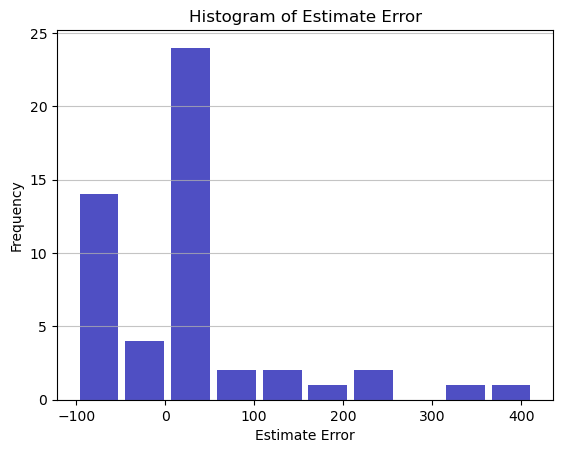

In [20]:
n, bins, patches = plt.hist(x=opt.calls['estimate_error'].replace([np.inf, -np.inf], np.nan).dropna(axis=0), bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Estimate Error')
plt.ylabel('Frequency')
plt.title('Histogram of Estimate Error')

### Mibian - Options Pricing Library

MibianLib is an open source python library for options pricing. You can use it to calculate the price, the implied volatility, the greeks or the put/call parity of an option using the Black-Scholes(-Merton) pricing models.

In [21]:
pip install mibian

Note: you may need to restart the kernel to use updated packages.


In [22]:
import mibian as mb

In [23]:
option_100 = mb.BS([S, 150, r*100, 30], volatility = vol*100)

# Used for pricing European options on stocks without dividends 
# BS([underlyingPrice, strikePrice, interestRate, daysToExpiration], volatility=x, callPrice=y, putPrice=z)

C:\UoW_Apps\anaconda3\Lib\site-packages\mibian\__init__.py:256: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.underlyingPrice = float(args[0])


In [24]:
option_100.callPrice

78.69022155705741

In [25]:
AAPL_mb_bsm_call = np.zeros((len(K),1))
for i in range(len(K)):
    AAPL_mb_bsm_call [i] = mb.Me([S, K[i], r*100, q*100, 7], volatility = vol*100).callPrice

C:\UoW_Apps\anaconda3\Lib\site-packages\mibian\__init__.py:414: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.underlyingPrice = float(args[0])


In [26]:
opt.calls['MB_BSMPrice'] = pd.DataFrame(AAPL_mb_bsm_call).round(2)
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,BSMPrice,estimate_error,MB_BSMPrice
0,AAPL241122C00100000,2024-11-14 20:58:18+00:00,100.0,128.35,0.0,0.0,0.0,0.0,7.0,0.0,0.000010,True,REGULAR,USD,128.27,-0.062330,128.28
1,AAPL241122C00125000,2024-11-15 17:46:23+00:00,125.0,99.89,0.0,0.0,0.0,0.0,NaN,NaN,0.000010,True,REGULAR,USD,103.29,3.403744,103.30
2,AAPL241122C00130000,2024-11-08 19:30:48+00:00,130.0,97.82,0.0,0.0,0.0,0.0,3.0,0.0,0.000010,True,REGULAR,USD,98.29,0.480474,98.30
3,AAPL241122C00135000,2024-11-08 20:24:06+00:00,135.0,92.99,0.0,0.0,0.0,0.0,3.0,0.0,0.000010,True,REGULAR,USD,93.29,0.322615,93.31
4,AAPL241122C00140000,2024-11-15 15:50:11+00:00,140.0,84.82,0.0,0.0,0.0,0.0,8.0,0.0,0.000010,True,REGULAR,USD,88.30,4.102806,88.31
5,AAPL241122C00145000,2024-11-15 15:39:53+00:00,145.0,80.08,0.0,0.0,0.0,0.0,3.0,0.0,0.000010,True,REGULAR,USD,83.30,4.020979,83.31
6,AAPL241122C00150000,2024-11-11 20:36:04+00:00,150.0,74.00,0.0,0.0,0.0,0.0,1.0,0.0,0.000010,True,REGULAR,USD,78.30,5.810811,78.32
7,AAPL241122C00155000,2024-11-13 20:50:00+00:00,155.0,70.85,0.0,0.0,0.0,0.0,NaN,0.0,0.000010,True,REGULAR,USD,73.31,3.472124,73.32
8,AAPL241122C00160000,2024-11-07 17:48:22+00:00,160.0,67.54,0.0,0.0,0.0,0.0,1.0,0.0,0.000010,True,REGULAR,USD,68.31,1.140065,68.33
9,AAPL241122C00165000,2024-11-13 15:10:29+00:00,165.0,59.20,0.0,0.0,0.0,0.0,13.0,0.0,0.000010,True,REGULAR,USD,63.31,6.942568,63.33


In [27]:
opt.calls['estimate_error_mb'] = ((opt.calls['MB_BSMPrice'] - opt.calls['lastPrice'] )/opt.calls['lastPrice'] )*100
opt.calls['estimate_error_mb']

0      -0.054538
1       3.413755
2       0.490697
3       0.344123
4       4.114596
5       4.033467
6       5.837838
7       3.486239
8       1.169677
9       6.976351
10      5.479204
11      6.872370
12      7.422222
13      8.350000
14      8.948864
15     10.887720
16      9.344262
17     11.978221
18     11.834320
19     14.071460
20     14.397649
21     17.786561
22     22.876254
23     22.608025
24     22.648402
25     30.960854
26     40.160000
27     56.470588
28     85.000000
29    126.206897
30    183.783784
31    257.142857
32    360.000000
33    414.285714
34    240.000000
35    133.333333
36     50.000000
37    -50.000000
38   -100.000000
39   -100.000000
40   -100.000000
41   -100.000000
42   -100.000000
43   -100.000000
44   -100.000000
45   -100.000000
46   -100.000000
47   -100.000000
48   -100.000000
49   -100.000000
50   -100.000000
Name: estimate_error_mb, dtype: float64

In [28]:
opt.calls['estimate_error_mb'].replace([np.inf, -np.inf], np.nan).dropna(axis=0).describe()

count     51.000000
mean      16.718858
std      112.191747
min     -100.000000
25%      -75.000000
50%        6.976351
75%       22.762328
max      414.285714
Name: estimate_error_mb, dtype: float64

Text(0.5, 1.0, 'Histogram of Estimate Error')

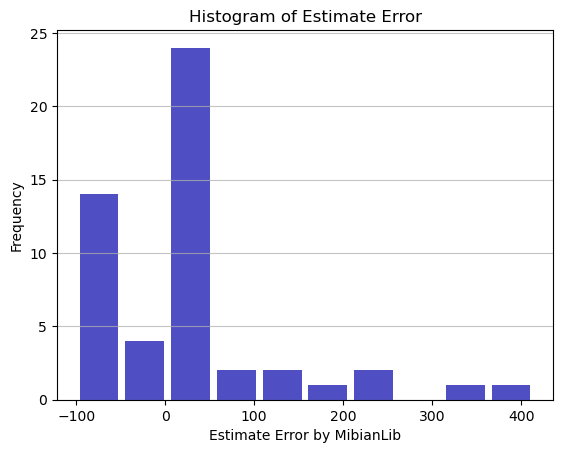

In [29]:
n, bins, patches = plt.hist(x=opt.calls['estimate_error_mb'].replace([np.inf, -np.inf], np.nan).dropna(axis=0), bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Estimate Error by MibianLib')
plt.ylabel('Frequency')
plt.title('Histogram of Estimate Error')

The mean, median, and the standard deviation are quite similar to what we calculated.